## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [2]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [7]:
# Importing required packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score


### Data Loading

In [9]:
# Read the hour.csv file
df = pd.read_csv('hour.csv')

# YOUR CODE HERE
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the first five rows of dataset

In [10]:
# YOUR CODE HERE
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


print the datatypes of the columns

In [11]:
# YOUR CODE HERE
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

<ipython-input-12-d9600d365771>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hr', palette="coolwarm")


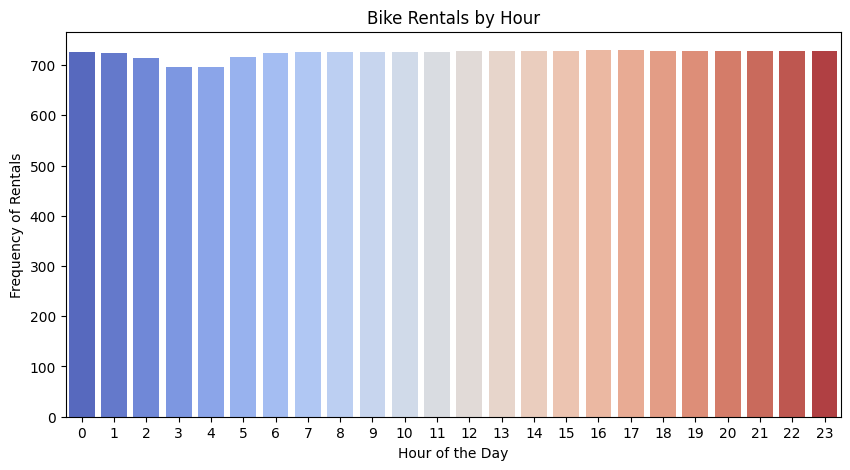

In [12]:
# Visualizing the 'hr' column
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hr', palette="coolwarm")
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency of Rentals')
plt.show()



#### Visualize the distribution of count, casual and registered variables

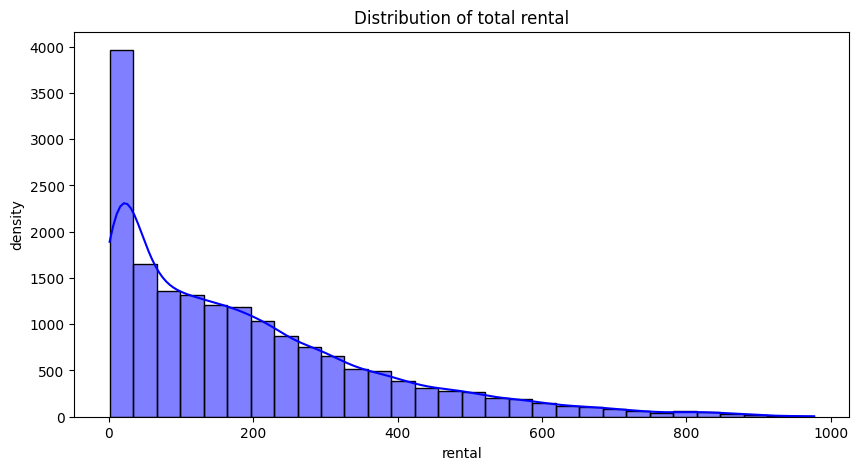

In [14]:
# YOUR CODE HERE for distribuiton of count variable
plt.figure(figsize=(10, 5))
sns.histplot(df['cnt'], kde=True, color="blue", bins=30)
plt.title('Distribution of total rental')
plt.xlabel('rental')
plt.ylabel('density')
plt.show()

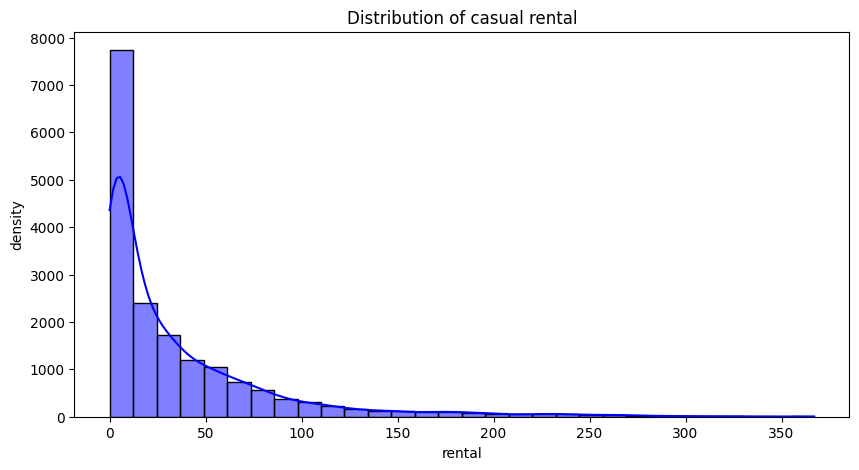

In [15]:
# YOUR CODE HERE for distribuiton of casual variable
plt.figure(figsize=(10, 5))
sns.histplot(df['casual'], kde=True, color="blue", bins=30)
plt.title('Distribution of casual rental')
plt.xlabel('rental')
plt.ylabel('density')
plt.show()

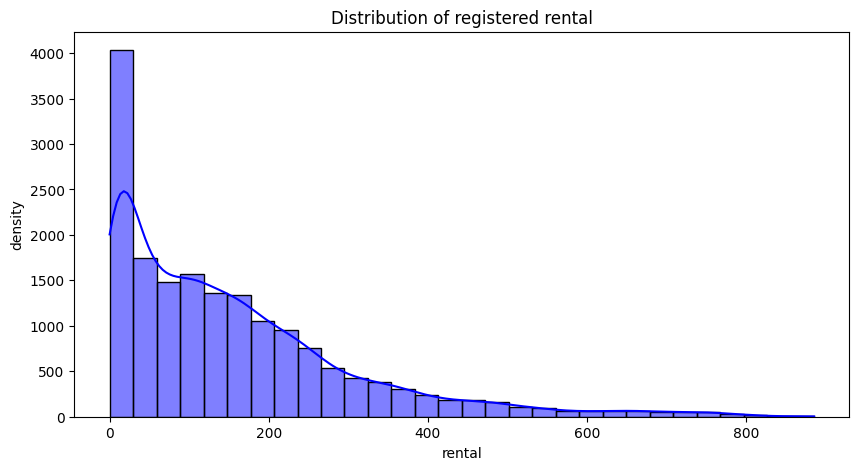

In [19]:
# YOUR CODE HERE for distribuiton of registered variable
plt.figure(figsize=(10 , 5))
sns.histplot(df['registered'], kde=True, color="blue", bins=30)
plt.title('Distribution of registered rental')
plt.xlabel('rental')
plt.ylabel('density')
plt.show()

#### Describe the relation of weekday, holiday and working day

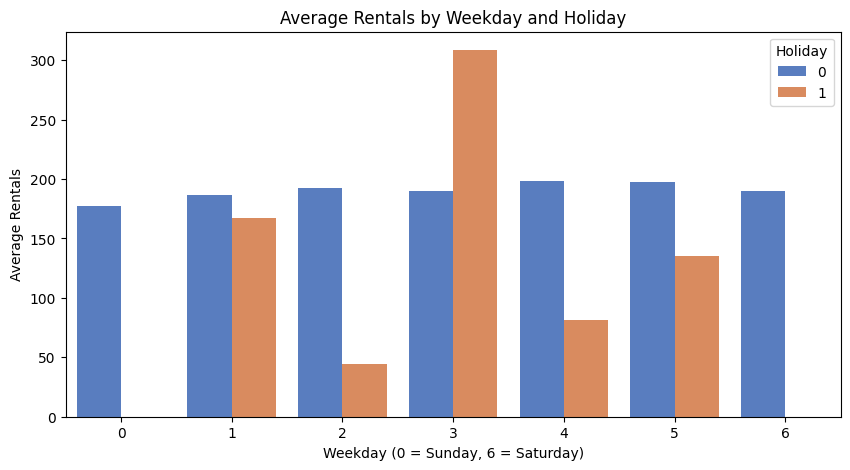

In [20]:
# YOUR CODE HERE
relation_table = df.groupby(['weekday', 'holiday', 'workingday'])['cnt'].mean().reset_index()

# Visualizing with a count plot
plt.figure(figsize=(10, 5))
sns.barplot(data=relation_table, x='weekday', y='cnt', hue='holiday', palette="muted")
plt.title('Average Rentals by Weekday and Holiday')
plt.xlabel('Weekday (0 = Sunday, 6 = Saturday)')
plt.ylabel('Average Rentals')
plt.legend(title='Holiday')
plt.show()

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

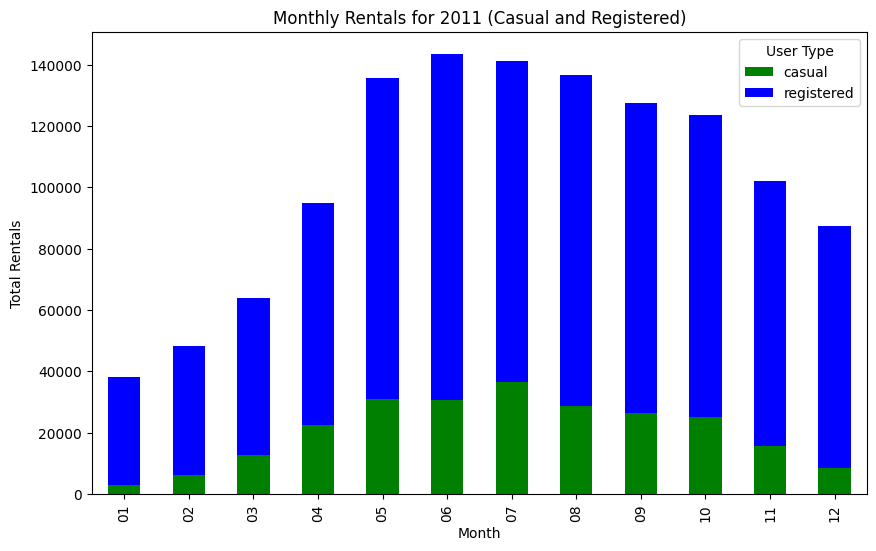

In [21]:
# stacked bar chart for year 2011
# YOUR CODE HERE
# Filter for 2011
df_2011 = df[df['dteday'].str.contains('2011')]

# Grouping data
month_data_2011 = df_2011.groupby(df_2011['dteday'].str.slice(5, 7)).sum()

# Plotting
month_data_2011[['casual', 'registered']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'blue'])
plt.title('Monthly Rentals for 2011 (Casual and Registered)')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='User Type')
plt.show()


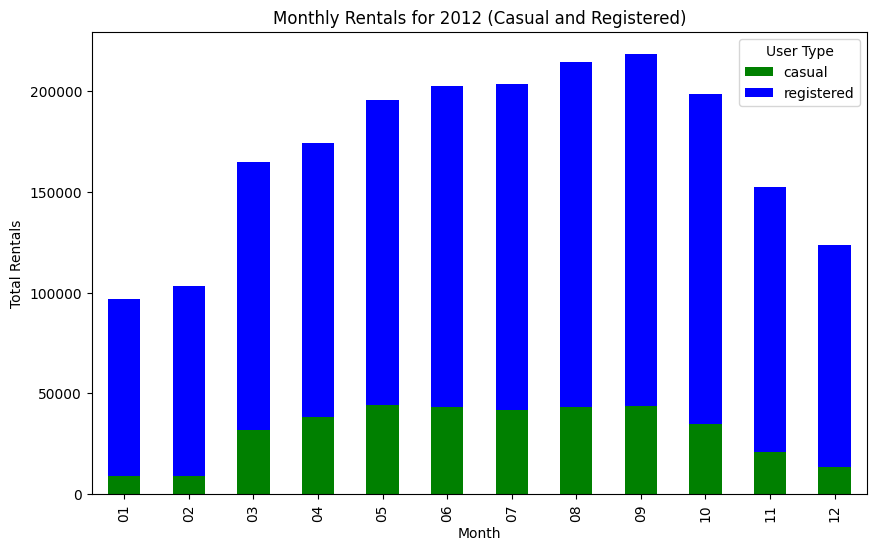

In [22]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df_2012 = df[df['dteday'].str.contains('2012')]

# Grouping data
month_data_2012 = df_2012.groupby(df_2012['dteday'].str.slice(5, 7)).sum()

# Plotting
month_data_2012[['casual', 'registered']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'blue'])
plt.title('Monthly Rentals for 2012 (Casual and Registered)')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.legend(title='User Type')
plt.show()


#### Analyze the correlation between features with heatmap

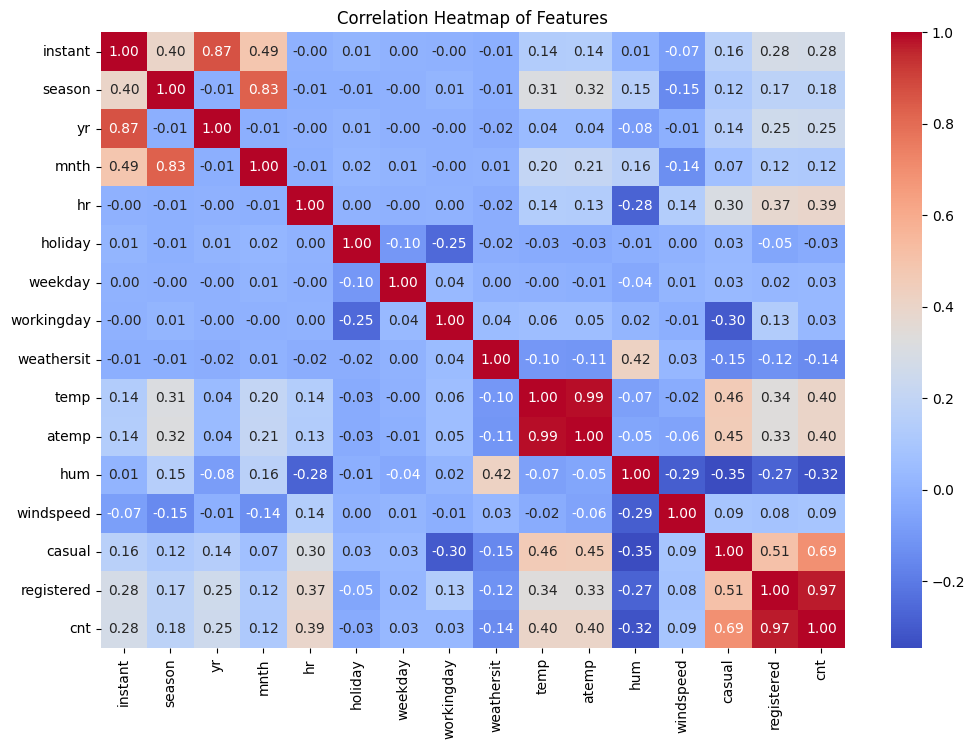

In [25]:
# Selecting only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()




#### Visualize the box plot of casual and registered variables to check the outliers

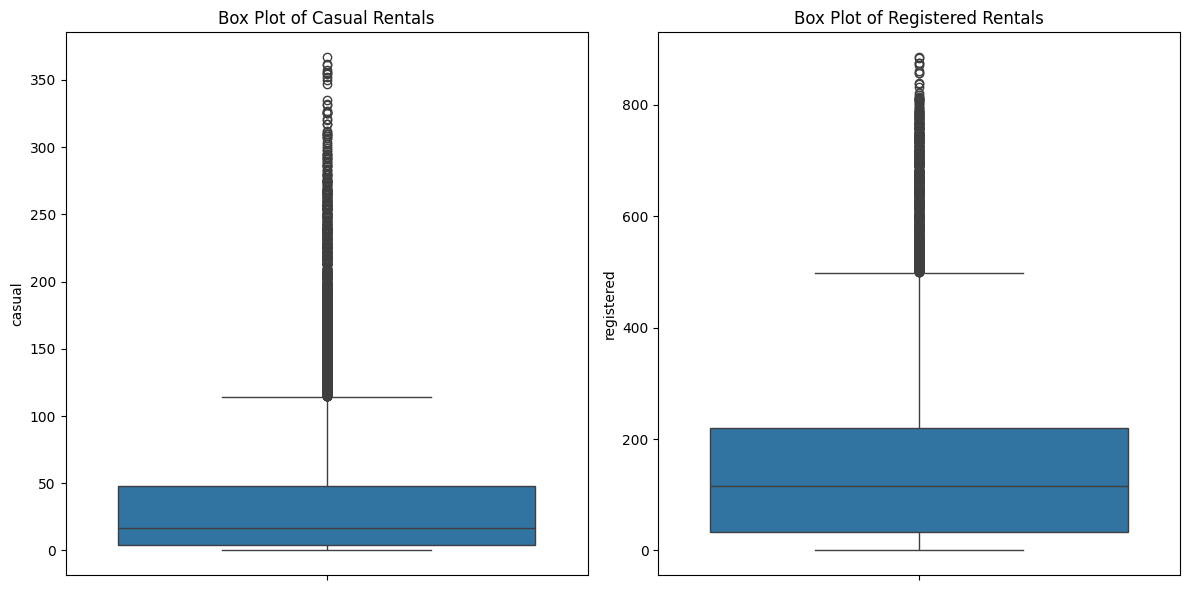

In [26]:
# Visualizing box plots for casual and registered to check outliers
plt.figure(figsize=(12, 6))

# Box plot for casual variable
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='casual')
plt.title('Box Plot of Casual Rentals')

# Box plot for registered variable
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='registered')
plt.title('Box Plot of Registered Rentals')

plt.tight_layout()
plt.show()


### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [27]:

# Dropping unwanted columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df.head()
# YOUR CODE HERE

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


#### Identify categorical and continuous variables


In [33]:
# YOUR CODE HERE
# Identifying variables
categorical_vars = ['season', 'hr', 'holiday', 'workingday', 'weathersit']
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [36]:

# Check the columns in the DataFrame
print(df.columns)
# Update continuous variables list based on actual columns
continuous_vars = ['temp', 'atemp', 'windspeed', 'cnt']  # Adjust this if 'humidity' is missing

# Check the continuous variables in the DataFrame
print([var for var in continuous_vars if var in df.columns])
# Apply scaling to the available continuous variables
scaler = MinMaxScaler()

# Apply scaling only to the columns that exist in the DataFrame
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])
df.head()


Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
['temp', 'atemp', 'windspeed', 'cnt']


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.224490,0.2879,0.81,0.0,0.015369
1,1,0,1,1,0,6,0,1,0.204082,0.2727,0.80,0.0,0.039959
2,1,0,1,2,0,6,0,1,0.204082,0.2727,0.80,0.0,0.031762
3,1,0,1,3,0,6,0,1,0.224490,0.2879,0.75,0.0,0.012295
4,1,0,1,4,0,6,0,1,0.224490,0.2879,0.75,0.0,0.000000


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [38]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample dataframe
data = {'season': ['spring', 'summer', 'fall', 'winter', 'summer']}
df = pd.DataFrame(data)

# Instantiate the encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical column
encoded_vars = encoder.fit_transform(df[['season']])

# Convert the result to a DataFrame for better readability
encoded_df = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(['season']))

# Display the encoded DataFrame
print(encoded_df)


   season_spring  season_summer  season_winter
0            1.0            0.0            0.0
1            0.0            1.0            0.0
2            0.0            0.0            0.0
3            0.0            0.0            1.0
4            0.0            1.0            0.0


#### Specify features and targets after applying scaling and one-hot encoding

In [39]:
# YOUR CODE HERE
# Define features and target
features = df.drop(['cnt', 'casual', 'registered'], axis=1)  # Drop the target columns
target = df['cnt']  # We will use 'cnt' as the target variable

# Apply one-hot encoding for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather', 'month', 'weekday', 'hour']
features = pd.get_dummies(features, columns=categorical_vars, drop_first=True)

# Apply scaling to continuous variables
continuous_vars = ['temp', 'humidity', 'windspeed']
scaler = MinMaxScaler()
features[continuous_vars] = scaler.fit_transform(features[continuous_vars])

# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



KeyError: "['cnt', 'casual', 'registered'] not found in axis"

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [40]:
# YOUR CODE HERE
import numpy as np
import scipy.linalg

# Add a column of ones for the intercept term
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]  # Add intercept term
y_train = y_train.values.reshape(-1, 1)  # Ensure y_train is a column vector

# Compute theta using the normal equation
theta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ (X_train_with_intercept.T @ y_train)

# Make predictions on the test set
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]  # Add intercept term to test set
y_pred = X_test_with_intercept @ theta

# Calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Normal Equation): {mse}")


NameError: name 'X_train' is not defined

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
# YOUR CODE HERE


#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [ ]:
# YOUR CODE HERE

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
# YOUR CODE HERE

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
